# Introducción.

La cátedra de Teoría de la Información ha proporcionado cuatro datasets con la finalidad de que se realice el análisis de las temperaturas promedio de tres ciudades con condiciones meteorológicas bastante distintas. Estas tres ciudades son introducidas por la cátedra de la siguiente manera:

- Quito: donde la temperatura no cambia ni aunque recen diez climas distintos.

- Melbourne: donde podés experimentar las cuatro estaciones antes del almuerzo.

- Oslo: donde el clima no se decide si quiere ser Siberia o un spa nórdico.

Brindando un poco de contexto geográfico, Quito es la capital de Ecuador, Melbourne es una ciudad de Australia y Oslo es la capital y ciudad más poblada de Noruega. Para poder tener en claro la distancia entre estos países, se invita a observar el siguiente mapa, en el que se encuentran coloreadas los tres países a los que pertenecen las ciudades a analizar:

<img src="images/mapa.png" width="" align="" />

Habiendo introducido la tarea asignada y un poco de contexto geográfico, se realiza el trabajo de preparar todo lo necesario para analizar los datos y resolver las consignas propuestas: la importación de las librerías, la carga de los datos y su limpieza.

## Importación de Librerías.

Se importan las librerías necesarias que se utilizarán a lo largo del trabajo:

In [1]:
# Utilizada para la obtención de valores aleatorios.
import random

# Utilizada en la lectura de los datos.
import pandas as pd

# Utilizada en la creación de matrices.
import numpy as np

# Utilizadas para la visualización de los datos.
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de los Datos.

Se realiza la lectura y carga de los datasets:

In [2]:
# Datasets correspondientes a las temperaturas de Quito, Melbourne y Oslo, mencionados en la explicación.
dataset_raw_quito=pd.read_csv("temperature_Quito_celsius.csv")
dataset_raw_melbourne=pd.read_csv("temperature_Melbourne_celsius.csv")
dataset_raw_oslo=pd.read_csv("temperature_Oslo_celsius.csv")

# (Este dataset será usado e introducido recién en la parte 4).
dataset_raw_melbourne_ruidoso = pd.read_csv("temperature_Melbourne_celsius_ruidoso.csv")

Los datasets contienen las temperaturas promedio de las ciudades, tomadas durante:

In [3]:
print("Tamaño del dataset de Quito: ", dataset_raw_quito.shape[0])
print("Tamaño del dataset de Melbourne: ", dataset_raw_melbourne.shape[0])
print("Tamaño del dataset de Oslo: ", dataset_raw_oslo.shape[0])
print("Tamaño del dataset de Melbourne ruidoso: ", dataset_raw_melbourne_ruidoso.shape[0])

Tamaño del dataset de Quito:  5844
Tamaño del dataset de Melbourne:  5844
Tamaño del dataset de Oslo:  5844
Tamaño del dataset de Melbourne ruidoso:  5844


5844 días en cada uno de los casos, lo que equivale a un poco más de 16 años.

## Limpieza de los Datos.

Se identificaron outliers en los datasets de Melbourne y Oslo, al igual que en el de Melbourne ruidoso (este último será introducido y utilizado recién en la parte 4).

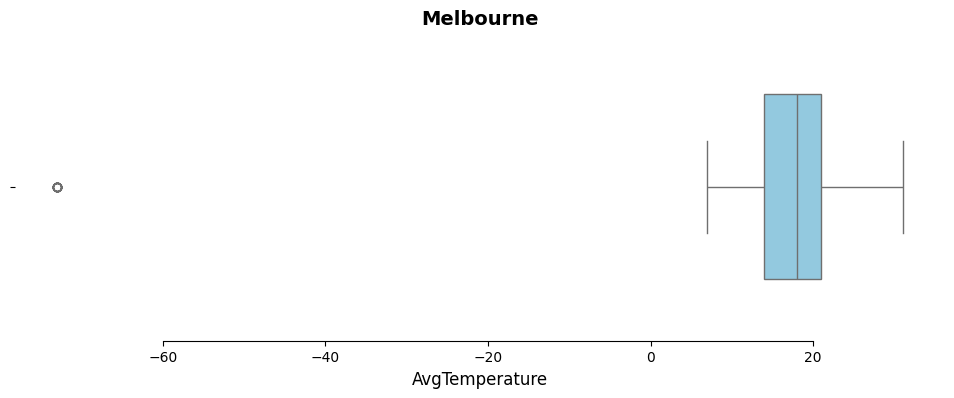

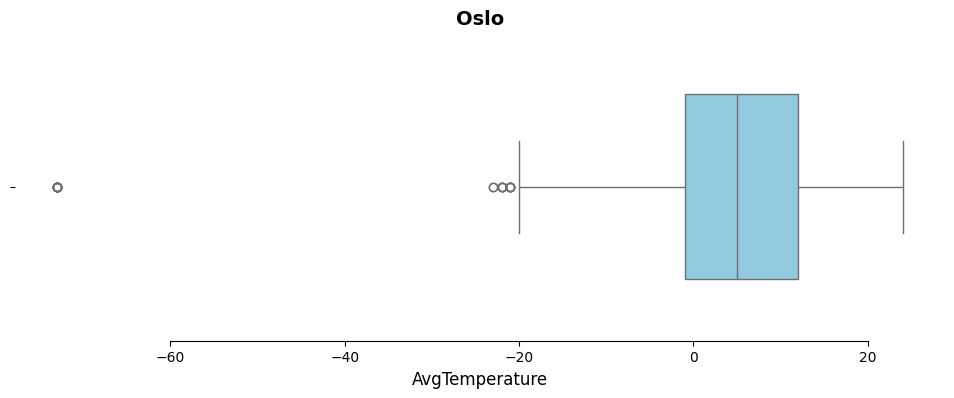

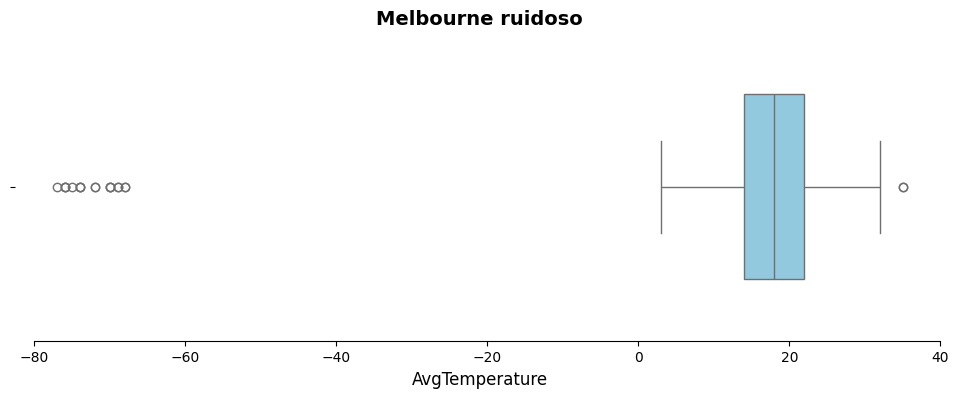

In [4]:
def mostrar_boxplot(dataset, x, title):
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=dataset[x], color='skyblue', width=0.6)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(x, fontsize=12)
    sns.despine(offset=0, trim=True)
    plt.show()

mostrar_boxplot(dataset_raw_melbourne, "AvgTemperature", "Melbourne")
mostrar_boxplot(dataset_raw_oslo, "AvgTemperature", "Oslo")
mostrar_boxplot(dataset_raw_melbourne_ruidoso, "AvgTemperature", "Melbourne ruidoso")

En los dos primeros datasets, el valor de los outliers es el mismo: -73. Por otro lado, en el de Melbourne ruidoso, estos outliers varían entre -77.0 y -68.0. A destacar, en el dataset de Oslo figuran otros datos inferiores al bigote inferior de la caja, sin embargo, estos son datos inusuales, pero reales. Por consiguiente, permanecieron en el dataset.

Al momento de manejar estos datos, se evaluaron distintas alternativas, tales como:

- Eliminar todas las entradas del dataset en las que aparezca dicha temperatura. Sin embargo, esto implicaría, para mantener consistencia, eliminar dichos días también de los demás datasets. Y, al estar realizadas las mediciones por días, perderlas dificultaría la toma de estadísticas entre años.

- Imputar los datos, a partir de sus datos vecinos. En la mayoría de las ocasiones en las que aparece un outlier, lo hace entre dos valores cercanos entre sí, lo que facilite poder tomar una estimación de qué valor tendría que ocupar dicho lugar.

Se presenta a continuación una secuencia de datos del dataset de Melbourne en la que puede presenciarse lo mencionado:

In [5]:
print(dataset_raw_melbourne.loc[[1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471]])

      AvgTemperature
1450            20.0
1451            22.0
1452            22.0
1453           -73.0
1454           -73.0
1455            22.0
1456            22.0
1457            23.0
1458            24.0
1459           -73.0
1460           -73.0
1461            23.0
1462            23.0
1463            25.0
1464            26.0
1465            26.0
1466            25.0
1467            25.0
1468            23.0
1469            23.0
1470           -73.0
1471            27.0


Para imputar dichos datos, se obtuvieron sus correspondientes índices del dataset:

In [6]:
def get_indexes_outliers(dataset, min_range, max_range=None):

    # Si no se especifica un max_range, se usa un valor exacto.
    if max_range is None:
        return list(dataset[dataset["AvgTemperature"] == min_range].index)
    
    # Se busca por rangos.
    return list(dataset[(dataset["AvgTemperature"] >= min_range) & 
                       (dataset["AvgTemperature"] <= max_range)].index)

datos_basura_melbourne = get_indexes_outliers(dataset_raw_melbourne, -73.0)
datos_basura_oslo = get_indexes_outliers(dataset_raw_oslo, -73.0)
datos_basura_melbourne_ruidoso = get_indexes_outliers(dataset_raw_melbourne_ruidoso, -77.0, -68.0)

print("Indices de datos basura: ")
print(datos_basura_melbourne)
print(datos_basura_oslo)
print(datos_basura_melbourne_ruidoso)

Indices de datos basura: 
[1453, 1454, 1459, 1460, 1470, 2246, 2725, 2726, 2727, 2728, 2806, 2981, 3187, 4622, 4790, 5015, 5212]
[1453, 1454, 1459, 1460, 1470, 2725, 2726, 2727, 2728, 4622, 4723, 5212]
[1453, 1454, 1459, 1460, 1470, 2246, 2725, 2726, 2727, 2728, 2806, 2981, 3187, 4622, 4790, 5015, 5212]


Utilizando los anteriores índices, se completa el dato a partir de los datos anteriores, realizando una imputación por media móvil de orden 5 (es decir, se remplaza el outlier por el promedio de los cinco datos anteriores):

In [7]:
def imputar_dataset(indexes, dataset, orden=5):
    # Se realiza una copia para no modificar el dataset original.
    out = dataset.copy()
    for index in indexes:
        if index >= orden:
            out["AvgTemperature"][index] = round(out["AvgTemperature"][index - orden:index].mean())
    return out

cleaned_dataset_quito = dataset_raw_quito.copy() # Se redefine el nombre para mayor claridad.
cleaned_dataset_melbourne = imputar_dataset(datos_basura_melbourne, dataset_raw_melbourne)
cleaned_dataset_oslo = imputar_dataset(datos_basura_oslo, dataset_raw_oslo)
cleaned_dataset_melbourne_ruidoso = imputar_dataset(datos_basura_melbourne_ruidoso, dataset_raw_melbourne_ruidoso)

A continuación, se grafican nuevamente los boxplots con la finalidad de mostrar que los datos fueron efectivamente imputados:

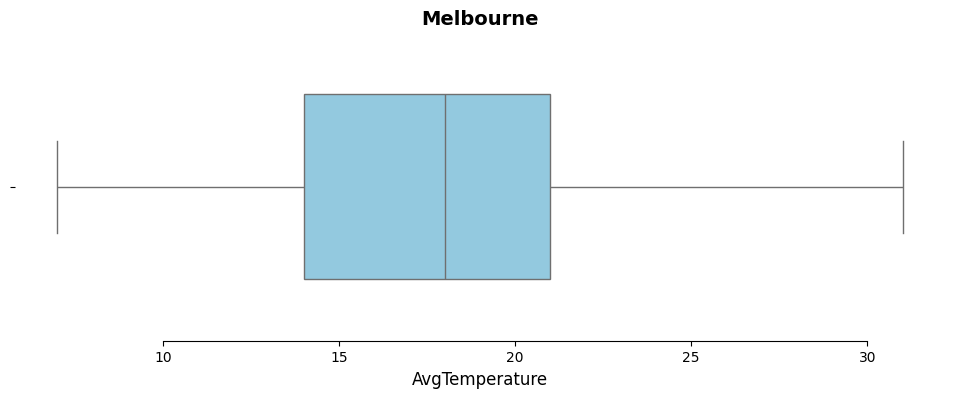

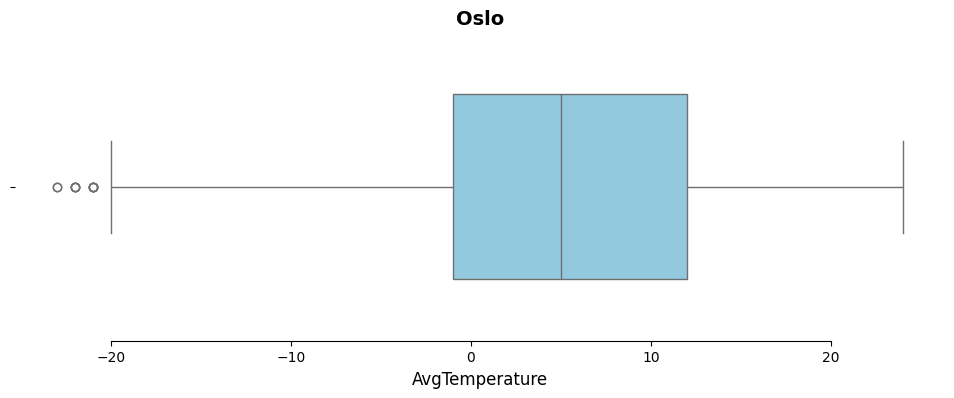

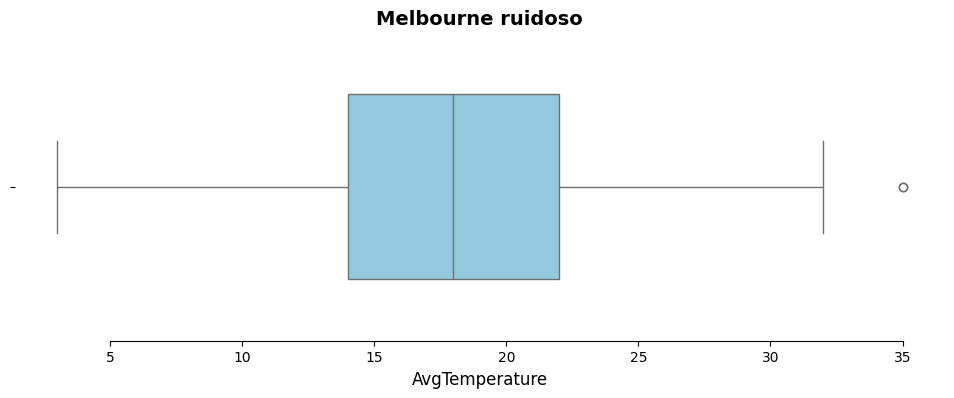

In [8]:
# Se observan nuevamente los boxplots con la finalidad de corroborar la limpieza de los datos.
mostrar_boxplot(cleaned_dataset_melbourne, "AvgTemperature", "Melbourne")
mostrar_boxplot(cleaned_dataset_oslo, "AvgTemperature", "Oslo")
mostrar_boxplot(cleaned_dataset_melbourne_ruidoso, "AvgTemperature", "Melbourne ruidoso")

Habiendo comprobado que los datos están limpios, se prosiguió con la resolución del trabajo práctico.

# Parte 1: Estadísticas para ingenieros que miran el cielo.

Dadas las señales de temperaturas diarias registradas durante cierto periodo en las tres ciudades anteriormente mencionadas, expresadas como valores enteros, en °C (grados centígrados), se pide:

## 1.1 Calcular la temperatura promedio y la desviación estándar para cada señal Si y analizar cómo se comportan estadísticamente.

Se realiza el cálculo de los promedios de las tres ciudades:

In [9]:
def calcular_promedio(dataset):
    suma = 0
    for temperature in dataset["AvgTemperature"]:
        suma = suma + temperature
    return suma / len(dataset["AvgTemperature"])

promedio_quito = calcular_promedio(cleaned_dataset_quito)
promedio_melbourne = calcular_promedio(cleaned_dataset_melbourne)
promedio_oslo = calcular_promedio(cleaned_dataset_oslo)

Y se realiza el cálculo de sus desviaciones estándar:

In [10]:
def calcular_desvio_estandar(dataset, promedio):
    suma = 0
    for temperature in dataset["AvgTemperature"]:
        suma += pow(temperature - promedio, 2)
    return np.sqrt(suma/len(dataset["AvgTemperature"]-1)) 

desvio_quito = calcular_desvio_estandar(dataset_raw_quito, promedio_quito)
desvio_melbourne = calcular_desvio_estandar(cleaned_dataset_melbourne, promedio_melbourne)
desvio_oslo = calcular_desvio_estandar(cleaned_dataset_oslo, promedio_oslo)

Los resultados obtenidos, redondeados a tres decimales, son los siguientes:

In [11]:
print("Resultados de Quito:")
print("Promedio: ", round(promedio_quito, 3))
print("Desviación estándar: ", round(desvio_quito, 3))

print("\nResultados de Melbourne:")
print("Promedio: ", round(promedio_melbourne, 3))
print("Desviación estándar: ", round(desvio_melbourne, 3))

print("\nResultados de Oslo:")
print("Promedio: ", round(promedio_oslo, 3))
print("Desviación estándar: ", round(desvio_oslo, 3))

Resultados de Quito:
Promedio:  13.604
Desviación estándar:  1.302

Resultados de Melbourne:
Promedio:  17.803
Desviación estándar:  4.252

Resultados de Oslo:
Promedio:  4.771
Desviación estándar:  8.79


De lo obtenido, se puede observar:

- En Quito, una temperatura promedio de aproximadamente 13.6 °C, con una desviación estándar de 1.3 °C. Es decir, la temperatura muy rara vez cambia y, si lo hace, siempre es un rango de aproximadamente 12.3 °C y 14.9 °C. Esto se corresponde con la descripción de la ciudad dada por la cátedra: "donde la temperatura no cambia ni aunque recen diez climas distintos".

- En Melbourne, se observa el promedio de temperatura más alto, siendo este de 17.8 °C, con una desviación estándar de 4.3 °C aproximadamente. Esto, si lo comparamos con los datos obtenidos en Quito, nos indica una mayor dispersión de los datos con respecto a la temperatura promedio.

- En Oslo, se observa el promedio de temperatura más bajo entre las tres ciudades, con una media de 4.8 °C aproximadamente, y, a su vez, la desviación estándar más alta, de 8.8 °C aproximadamente, lo que indica que es la ciudad, de las analizadas, en la que más dispersas se hallan las temperaturas con respecto a su media.

## 1.2 Calcular el factor de correlación cruzada entre cada par de señales. Discutir si existen correlaciones significativas o no (tratando de establecer, por ejemplo, si Melbourne podría estar prediciendo el clima de Quito, o de Oslo.. o si no tienen nada que ver).

In [12]:
# Se obtiene el dataset conjunto de las temperaturas de dos ciudades, junto con la frecuencia del par
def obtener_dataset_conjunto(dataset1, dataset2):
    resultado = pd.DataFrame({
        "temperaturas_ciudad1": dataset1["AvgTemperature"].values,
        "temperaturas_ciudad2": dataset2["AvgTemperature"].values
    }).value_counts().to_frame().reset_index()
    resultado.columns = ["temperaturas_ciudad1", "temperaturas_ciudad2", "frecuencia"]
    return resultado

In [13]:
def obtener_probabilidad_conjunta(primer_temperatura, segunda_temperatura, dataset):

    filtro = (
        (dataset["temperaturas_ciudad1"] == primer_temperatura) &
        (dataset["temperaturas_ciudad2"] == segunda_temperatura)
    )

    resultado = dataset[filtro]["frecuencia"] / dataset["frecuencia"].sum()

    if (len(resultado) == 0):
        return 0
    else:
        return resultado.values[0]

La correlación cruzada, en términos generales, es una medida de la similitud entre dos señales o procesos, considerando un posible desfase temporal entre ellos. Se utiliza para identificar si hay una relación entre dos señales y, en caso afirmativo, determinar el grado de esa relación y el tiempo de desfase

El coeficiente de correlación cruzada (o simplemente correlación cruzada) es una medida estadística que cuantifica la similitud entre dos series temporales o señales. Indica la fuerza y dirección de la relación entre ellas, incluyendo un desfase temporal (retardo). Varía entre -1 y +1, donde -1 indica una correlación negativa perfecta, 0 ninguna correlación y +1 una correlación positiva perfecta. 

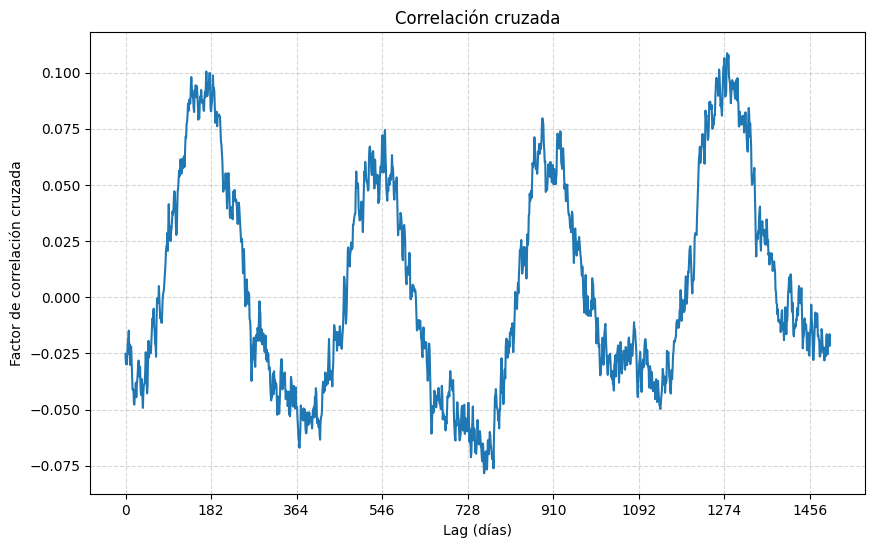

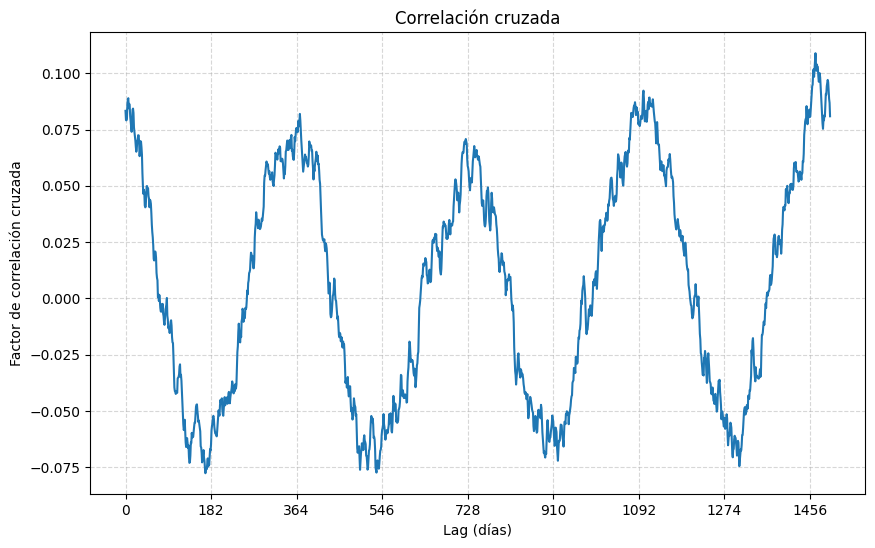

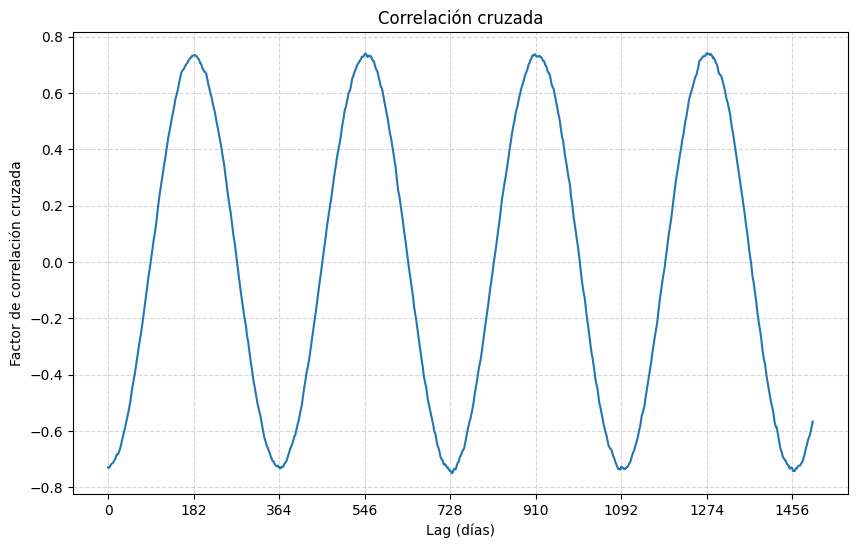

In [14]:
def get_media(arr):
    return sum(arr) / len(arr)

def get_varianza(arr, m):
    return sum((x - m) ** 2 for x in arr)

def get_factor_correlacion_cruzada(x, y, lag):
    
    N = len(x)
    
    promedio_x = get_media(x)
    promedio_y = get_media(y)
    
    # Aplicamos el lag
    # Construimos listas desplazadas que tengan tamaño común
    if lag > 0:
        x_lag = x[lag:]
        y_lag = y[:N - lag]
    elif lag < 0:
        x_lag = x[:N + lag]
        y_lag = y[-lag:]
    else:
        x_lag = x
        y_lag = y
    
    # Numerador
    num = sum(
        (x_lag[i] - promedio_x) * (y_lag[i] - promedio_y) 
        for i in range(len(x_lag))
    )
    
    # Denominador
    denom_x = get_varianza(x_lag, promedio_x)
    denom_y = get_varianza(y_lag, promedio_y)
    
    denom = (denom_x * denom_y) ** 0.5
    
    if denom == 0:
        return 0  # Evitar división por cero
    
    return num / denom

# Ejemplo de uso
quito_array = cleaned_dataset_quito["AvgTemperature"].values
melbourne_array = cleaned_dataset_melbourne["AvgTemperature"].values
oslo_array = cleaned_dataset_oslo["AvgTemperature"].values

def mostrar_grafico_de_correlacion(x, y, min_lag, max_lag):

    lags = []
    factores = []

    for lag in range(min_lag, max_lag):
        r = get_factor_correlacion_cruzada(x, y, lag)
        lags.append(lag)
        factores.append(r)

    plt.figure(figsize=(10, 6))
    plt.plot(lags, factores)
    plt.xlabel("Lag (días)")
    plt.ylabel("Factor de correlación cruzada")
    plt.title("Correlación cruzada")

    # Marcas cada 6 meses (182 días aprox.)
    marca_cada = 182
    posiciones_marcas = list(range(min_lag, max_lag, marca_cada))
    plt.xticks(posiciones_marcas)

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

desfase = 1500 # En días.
mostrar_grafico_de_correlacion(quito_array, melbourne_array, 0, desfase)
mostrar_grafico_de_correlacion(quito_array, oslo_array, 0, desfase)
mostrar_grafico_de_correlacion(melbourne_array, oslo_array, 0, desfase)

Entre Melbourne y Oslo se observa un pico en el gráfico de correlación cruzada cada seis meses, coincidente con los cambios de estación.

# Parte 2: Una fuente de calor… markoviana.

En esta segunda parte del trabajo que, considerando los valores de temperatura t que componen cada señal Si, se construya una nueva señal Ti compuesta por una secuencia de símbolos discretos F, T o C, definidos según: 

- F (frío): si t < 11°C

- T (templado): si 11 ≤ t < 19°C

- C (cálido): si t ≥ 19°C

Por consiguiente, se consigue una versión discretizada de cada una de las fuentes, aplicando el mapeo indicando:

In [15]:
def obtener_fuente_discreta(dataset):
    # Se realiza un remplazo de los valores de temperatura por los correspondientes simbolos.
    return dataset.map(lambda x: 'F' if x < 11.0 else 'T' if x < 19.0 else 'C')

# Se obtienen los datasets discretos para cada ciudad.
discrete_quito_dataset = obtener_fuente_discreta(dataset_raw_quito)
discrete_melbourne_dataset = obtener_fuente_discreta(cleaned_dataset_melbourne)
discrete_oslo_dataset = obtener_fuente_discreta(cleaned_dataset_oslo)

A su vez, se definen dos variables que se utilizarán, a partir de ahora, en el resto del trabajo:

In [16]:
# Se define dos constantes:
# - el número de símbolos en las fuentes;
NRO_SIMBOLOS = 3
# - y un diccionario que permita obtener el índice correspondiente a
#   cada simbolo y el símbolo de cada índice dentro de las estructuras que se creen.
INDEX = {
    'F': 0, 0 : 'F',
    'T': 1, 1 : 'T',
    'C': 2, 2 : 'C'
}

Con las fuentes discretizadas y las variables definidas, se nos propuso, para cada Ti:

## 2.1. Modelar la fuente con memoria de orden 1 (Markov), obtener la matriz de transición y analizar su comportamiento (por ejemplo, tratá de descubrir cosas como: En Oslo, si hace frío hoy, es casi seguro que siga así hasta julio..).

Se calculan las matrices de transición para cada ciudad:

In [17]:
def get_matriz_transicion(secuencia):

    # Se crea una matriz de ceros.
    matriz_transicion = np.zeros((NRO_SIMBOLOS, NRO_SIMBOLOS))

    # Se calcula la matriz de transición.
    simbolo = secuencia[0]
    for siguiente_simbolo in secuencia[1:]:
        # Se suma 1 a las apariciones de "siguiente_simbolo", dado que anteriormente salio "simbolo".
        matriz_transicion[INDEX[siguiente_simbolo], INDEX[simbolo]] += 1
        simbolo = siguiente_simbolo

    # Se divide cada celda de la matriz de transición por la cantidad de símbolos emitidos.
    suma_columnas = matriz_transicion.sum(axis=0)
    for j in range(NRO_SIMBOLOS):
        # La suma de las columnas debe dar uno.
        # Se normaliza por columna.
        if suma_columnas[j] > 0:
            # Se divide toda la columna por la cantidad de apariciones de un símbolo luego del de la columna.
            matriz_transicion[:, j] = matriz_transicion[:, j] / suma_columnas[j]

    return matriz_transicion

# Matriz de transición de Quito.
matriz_transicion_quito = get_matriz_transicion(discrete_quito_dataset["AvgTemperature"])
print("Matriz de transición de Quito:\n", matriz_transicion_quito.round(3))

# Matriz de transición de Melbourne.
matriz_transicion_melbourne = get_matriz_transicion(discrete_melbourne_dataset["AvgTemperature"])
print("\nMatriz de transición de Melbourne:\n", matriz_transicion_melbourne.round(3))

# Matriz de transición de Oslo.
matriz_transicion_oslo = get_matriz_transicion(discrete_oslo_dataset["AvgTemperature"])
print("\nMatriz de transición de Oslo:\n", matriz_transicion_oslo.round(3))

Matriz de transición de Quito:
 [[0.054 0.006 0.   ]
 [0.946 0.993 1.   ]
 [0.    0.001 0.   ]]

Matriz de transición de Melbourne:
 [[0.486 0.032 0.   ]
 [0.514 0.837 0.145]
 [0.    0.132 0.855]]

Matriz de transición de Oslo:
 [[0.959 0.099 0.   ]
 [0.041 0.866 0.296]
 [0.    0.035 0.704]]


## 2.2. Usar muestro Monte Carlo para obtener, para cada símbolos:

- Usar muestreo Monte Carlo para obtener, para cada símbolo:

### 2.2.1. La probabilidad estacionaria.

- La probabilidad estacionaria (esa a la que llegás después de mucho simular).

Para esto, se realiza el cálculo de la matriz estacionaria acumulada de cada ciudad:

In [18]:
def get_matriz_acumulada(matriz_transicion):

    # Se realiza una copia de la matriz de transición, para no modificar la original.
    out = matriz_transicion.copy()

    for i in range(NRO_SIMBOLOS-1): # -1, ya que se empieza a sumar desde la segunda columna.
        for j in range(NRO_SIMBOLOS):
            # Se le suma a cada fila los valores de las filas anteriores.
            out[i+1][j] += out[i][j]

    return out

# Obtención de las matrices acumuladas para cada ciudad.
matriz_acumulada_quito = get_matriz_acumulada(matriz_transicion_quito)
matriz_acumulada_melbourne = get_matriz_acumulada(matriz_transicion_melbourne)
matriz_acumulada_oslo = get_matriz_acumulada(matriz_transicion_oslo)

se definen la función de convergencia y la función que nos permite obtener el siguiente símbolo, dado uno anterior:

In [19]:
def get_siguiente(simbolo_anterior, nro_simbolos, matriz_transicion_acumulada):
    
    # Si no hay símbolo anterior, se retorna un símbolo aleatorio.
    if simbolo_anterior is None:
        return random.randint(0, nro_simbolos - 1)

    p = random.random()

    for i in range(nro_simbolos):
        if (p < matriz_transicion_acumulada[i, simbolo_anterior]):
            return i

    return None

def converge(probabilidad_actual, probabilidad_anterior, epsilon):

    for i in range(len(probabilidad_actual)):
        if (abs(probabilidad_actual[i] - probabilidad_anterior[i]) > epsilon):
            return False

    return True

se define una función que, dados los datos de ciudades, permita mostrar los gráficos de convergencia lado a lado:

In [20]:
def mostrar_graficos_de_convergencia(datos_ciudades, umbral, nro_simbolos=NRO_SIMBOLOS):
    
    fig, axes = plt.subplots(1, nro_simbolos, figsize=(6 * nro_simbolos, 5))
    
    # Graficar cada ciudad
    for i, (nombre_ciudad, historial, iteraciones) in enumerate(datos_ciudades):
        ax = axes[i]
        
        # Graficar cada símbolo
        for j in range(nro_simbolos):
            ax.plot(iteraciones, historial[j], label=f'{INDEX[j]}')
        
        ax.set_xlabel('Iteraciones')
        ax.set_ylabel('Probabilidad')
        ax.set_title(f'{nombre_ciudad}')
        ax.legend()
        ax.grid(True)
    
    # Título principal con el umbral
    fig.suptitle(f'Convergencia del Vector Estacionario - Umbral: {umbral}', 
                 fontsize=16, fontweight='bold')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.88) # Necesario para que el título no se superponga.
    plt.show()

se define una función que permita mostrar el vector estacionario:

In [21]:
def mostrar_resultados_por_ciudad(datos_ciudad, resultados, title="Resultados", nro_simbolos=NRO_SIMBOLOS):

    print("\n", title)
    print("-" * 50)
    nombres_ciudades = [datos[0] for datos in datos_ciudades]
    
    # Encabezado
    header = "Ciudad".ljust(12)
    for j in range(nro_simbolos):
        header += f"{INDEX[j]}".ljust(10)
    print(header)
    print("-" * 50)
    
    # Datos
    for ciudad, vector in zip(nombres_ciudades, resultados):
        fila = f"{ciudad:<12}"
        for valor in vector:
            fila += f"{valor:.3f}".ljust(10)
        print(fila)

In [22]:
def mostrar_estacionarios(datos_ciudad, vectores_estacionarios, nro_simbolos=NRO_SIMBOLOS):

    print("\nVectores Estacionarios:")
    print("-" * 50)
    nombres_ciudades = [datos[0] for datos in datos_ciudades]
    
    # Encabezado
    header = "Ciudad".ljust(12)
    for j in range(nro_simbolos):
        header += f"{INDEX[j]}".ljust(10)
    print(header)
    print("-" * 50)
    
    # Datos
    for ciudad, vector in zip(nombres_ciudades, vectores_estacionarios):
        fila = f"{ciudad:<12}"
        for valor in vector:
            fila += f"{valor:.3f}".ljust(10)
        print(fila)

y, por último, se define la función que permitirá la toma de muestras cada cierto número de iteraciones y el cálculo del vector estacionario:

In [23]:
def get_vector_estacionario(matriz_transicion_acumulada, nro_simbolos=NRO_SIMBOLOS, epsilon=0.000005, min_iteraciones=100000):

    apariciones = np.zeros(nro_simbolos)
    vector_estacionario = np.zeros(nro_simbolos)
    vector_estacionario_anterior = np.full(nro_simbolos, -1)

    simbolo = None
    iteraciones = 0

    # Se guarda el historial para graficar.
    historial_iteraciones = []
    historial = [[] for _ in range(nro_simbolos)]

    while (not converge(vector_estacionario, vector_estacionario_anterior, epsilon) or (iteraciones < min_iteraciones)):

        simbolo = get_siguiente(simbolo, nro_simbolos, matriz_transicion_acumulada)
        iteraciones += 1

        apariciones[simbolo] += 1
        vector_estacionario_anterior = vector_estacionario.copy()
        vector_estacionario = np.array([ aparicion / iteraciones for aparicion in apariciones ])

        # Cada 100 iteraciones, se añade a cada símbolo la probabilidad hallada.
        # Esto con fines de poder realizar el diagrama de convergencia.
        if iteraciones % 100 == 0:
            for i in range(nro_simbolos):
                historial[i].append(vector_estacionario[i])
            historial_iteraciones.append(iteraciones)

    return vector_estacionario, historial, historial_iteraciones

Con las funciones definidas, se cálculo para los siguientes umbrales de convergencia:

In [24]:
umbrales = [0.005, 0.0005, 0.00005, 0.0000005]

A continuación se presentan los resultados obtenidos:

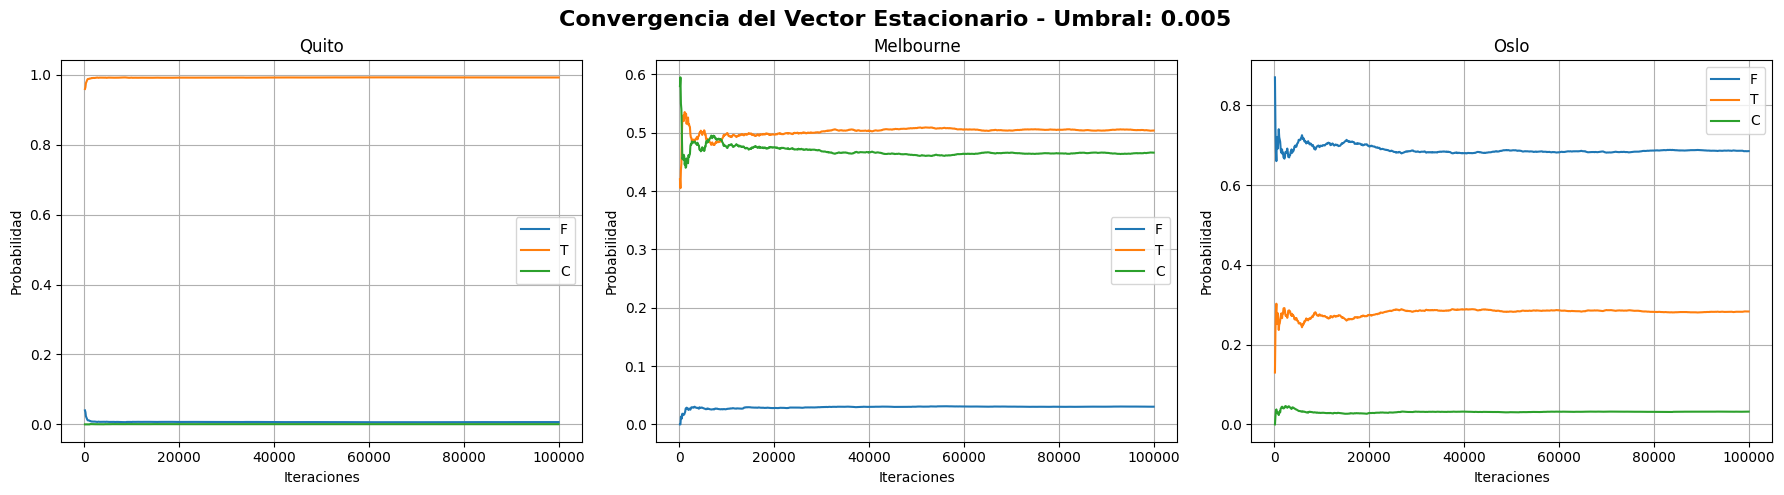


Vectores Estacionarios:
--------------------------------------------------
Ciudad      F         T         C         
--------------------------------------------------
Quito       0.007     0.993     0.001     
Melbourne   0.030     0.504     0.466     
Oslo        0.685     0.283     0.032     


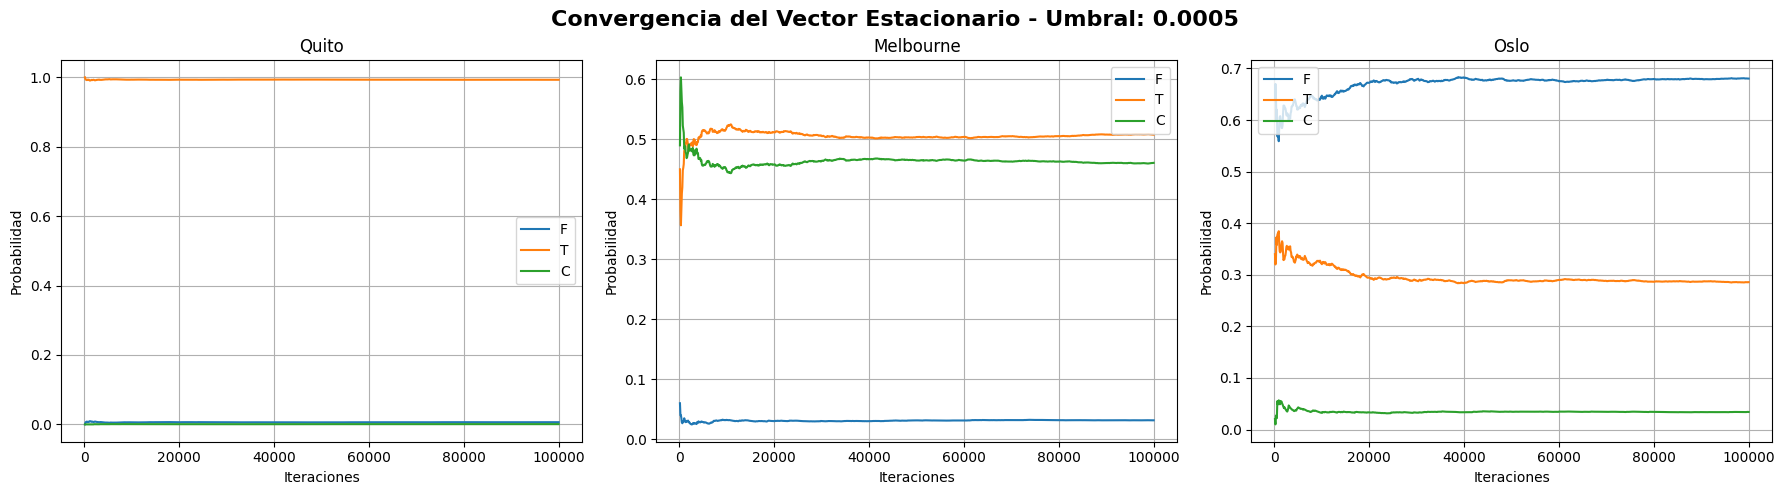


Vectores Estacionarios:
--------------------------------------------------
Ciudad      F         T         C         
--------------------------------------------------
Quito       0.006     0.993     0.001     
Melbourne   0.032     0.508     0.461     
Oslo        0.680     0.286     0.034     


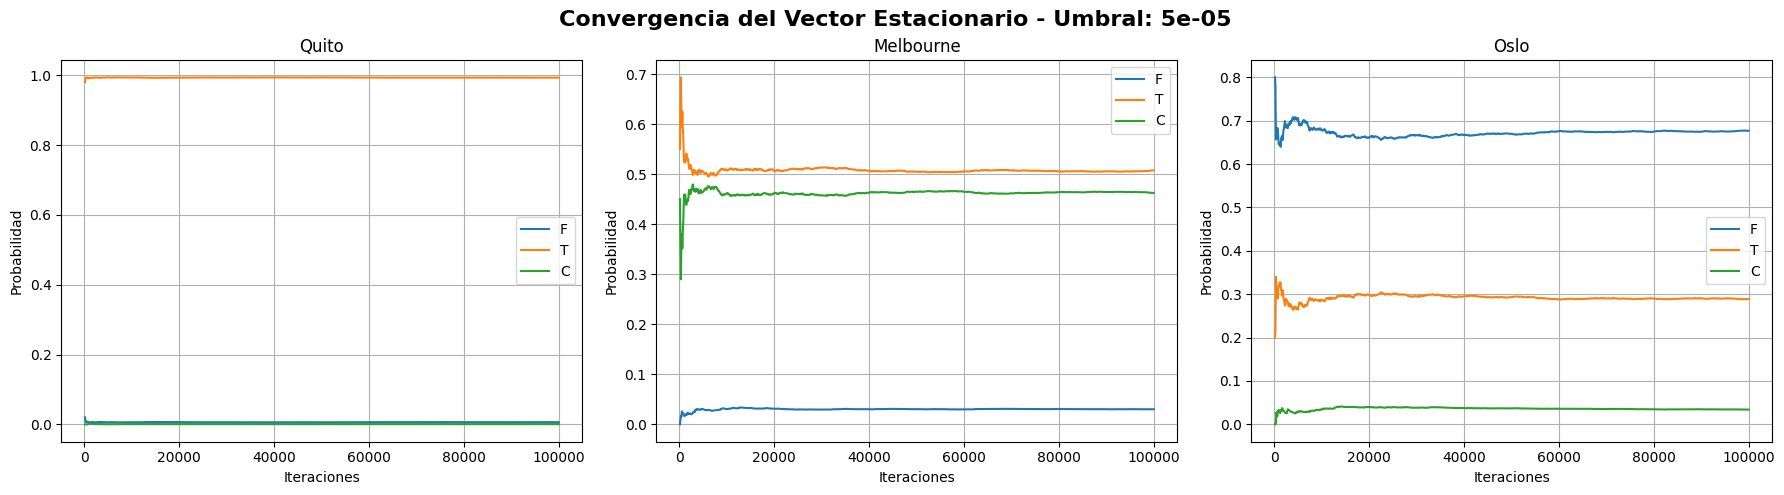


Vectores Estacionarios:
--------------------------------------------------
Ciudad      F         T         C         
--------------------------------------------------
Quito       0.006     0.993     0.001     
Melbourne   0.030     0.507     0.462     
Oslo        0.677     0.289     0.034     


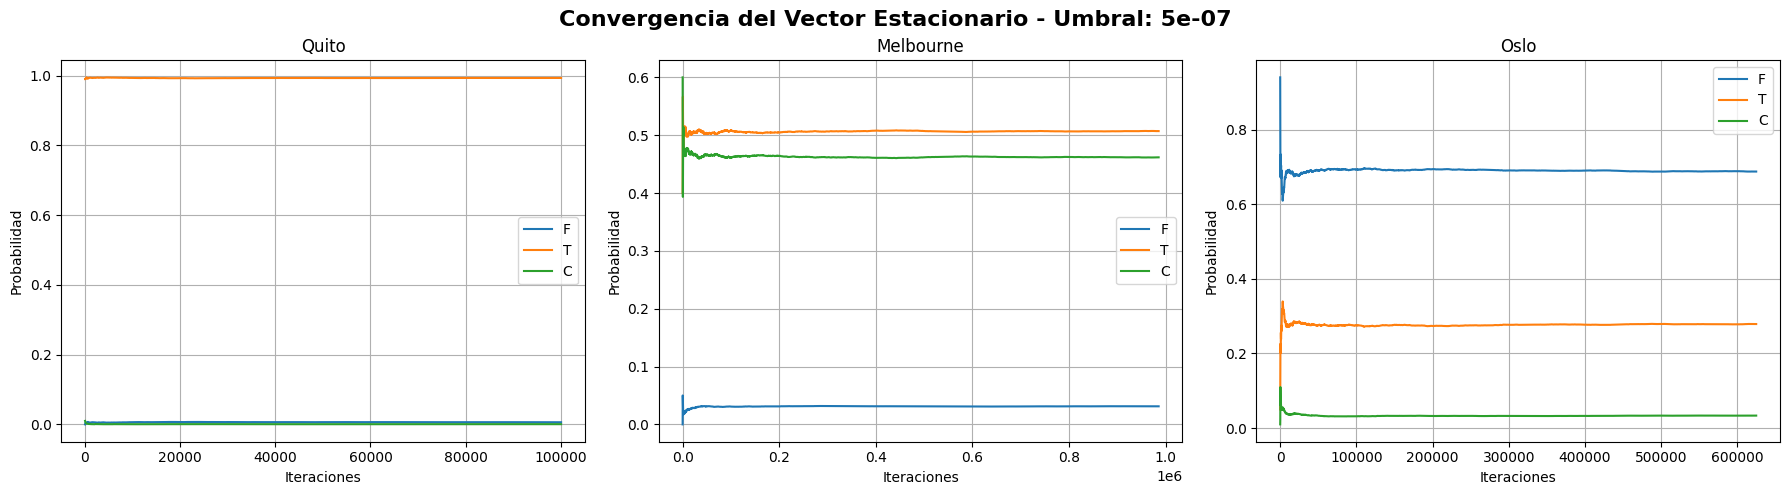


Vectores Estacionarios:
--------------------------------------------------
Ciudad      F         T         C         
--------------------------------------------------
Quito       0.006     0.993     0.001     
Melbourne   0.031     0.507     0.462     
Oslo        0.688     0.279     0.034     


In [25]:
for umbral in umbrales:

    vector_estacionario_quito, historial_quito, iteraciones_quito = get_vector_estacionario(matriz_acumulada_quito, epsilon=umbral)
    vector_estacionario_melbourne, historial_melbourne, iteraciones_melbourne = get_vector_estacionario(matriz_acumulada_melbourne, epsilon=umbral)
    vector_estacionario_oslo, historial_oslo, iteraciones_oslo = get_vector_estacionario(matriz_acumulada_oslo, epsilon=umbral)

    # Se preparan los datos a mostrar.
    datos_ciudades = [
        ('Quito', historial_quito, iteraciones_quito),
        ('Melbourne', historial_melbourne, iteraciones_melbourne),
        ('Oslo', historial_oslo, iteraciones_oslo)
    ]
    mostrar_graficos_de_convergencia(datos_ciudades, umbral)
    
    vectores = [vector_estacionario_quito, vector_estacionario_melbourne, vector_estacionario_oslo]
    mostrar_estacionarios(datos_ciudades, vectores)

Los resultados más precisos corresponden a los del umbral más bajo:

In [26]:
print("Vector estacionario de Quito: ", vector_estacionario_quito.round(3))
print("Vector estacionario de Melbourne: ", vector_estacionario_melbourne.round(3))
print("Vector estacionario de Oslo: ", vector_estacionario_oslo.round(3))

Vector estacionario de Quito:  [0.006 0.993 0.001]
Vector estacionario de Melbourne:  [0.031 0.507 0.462]
Vector estacionario de Oslo:  [0.688 0.279 0.034]


De estos, es posible analizar que:

- En Quito, es extremadamente raro presenciar un día que no sea templado (con un 0.7 % de probabilidad). La temperatura casi siempre es templada.

- En Melbourne, le temperatura varía generalmente entre templada y cálida, predominando por un 4.7 % las temperaturas templadas. Es muy raro hallar un día frío, aunque es más común que en Quito, con una probabilidad del 3.1 %.

- En Oslo, la mayoría de los días son fríos (el 68.1 %), hay de vez en cuando días templados (el 28.5 %) y muy rara vez se tiene un día cálido (el 3.4 % de las veces).

### 2.2.2. El tiempo medio de 1° recurrencia.

- El tiempo medio de 1° recurrencia (ese que te dice, en promedio, cuánto tarda un símbolo en volver a aparecer después de haberse emitido).
Nota: Experimentar con diferentes umbrales de convergencia ε (comentar si realmente influyen en los resultados, o todo es una ilusión matemática). Analizar precisión de resultados en función del tiempo e incluir gráfico de convergencia.

Se calculan las matrices de transición para cada ciudad:

"Quito, donde la temperatura no cambia ni aunque recen diez climas distintos."

Se experimentó con distintos números de e

### 2.2.3. El tiempo medio de 1° recurrencia.

Se define la función para el cálculo de las medias de primera recurrencia y, al igual que en la función del vector estacionario, el guardado del historial para los gráficos de convergencia:

In [91]:
def get_medias_primera_recurrencia(matriz_transicion_acumulada, nro_simbolos=NRO_SIMBOLOS, epsilon=0.0005, min_iteraciones=100000):
    
    pasos = np.zeros(nro_simbolos)
    ocurrencias = np.zeros(nro_simbolos)
    medias_recurrencia = np.zeros(nro_simbolos)
    t_ultima_ocurrencia = np.full(nro_simbolos, -1)
    medias_recurrencia_anterior = np.full(nro_simbolos, -1)
    
    t_actual = 0

    simbolo = None

    # Se guarda el historial para graficar.
    historial_iteraciones = []
    historial = [[] for _ in range(nro_simbolos)]
	
    while (not converge(medias_recurrencia, medias_recurrencia_anterior, epsilon) or (t_actual < min_iteraciones)):

        simbolo = get_siguiente(simbolo, nro_simbolos, matriz_transicion_acumulada)

        # Si la señal ya apareció al menos una vez...
        if (t_ultima_ocurrencia[simbolo] >= 0):
            # Se suma la cantidad de pasos desde la última ocurrencia.
            pasos[simbolo] += t_actual - t_ultima_ocurrencia[simbolo]
            ocurrencias[simbolo] += 1

        t_ultima_ocurrencia[simbolo] = t_actual
        t_actual += 1

        # Se actualiza la media de primera recurrencia del símbolo.
        medias_recurrencia_anterior[simbolo] = medias_recurrencia[simbolo]
        if (ocurrencias[simbolo] > 0):
            medias_recurrencia[simbolo] = pasos[simbolo] / ocurrencias[simbolo]

        # Cada 100 iteraciones, se añade a cada símbolo la probabilidad hallada.
        # Esto con fines de poder realizar el diagrama de convergencia.
        if t_actual % 100 == 0:
            for i in range(nro_simbolos):
                historial[i].append(medias_recurrencia[i])
            historial_iteraciones.append(t_actual)
        
    return medias_recurrencia, historial, historial_iteraciones

Media de recurrencia → Tiempo medio de espera para volver a emitir un símbolo.

In [ ]:
for umbral in umbrales:

    medias_primera_recurrencia_quito, historial_quito, iteraciones_quito = get_medias_primera_recurrencia(matriz_acumulada_quito, epsilon=umbral)
    medias_primera_recurrencia_melbourne, historial_melbourne, iteraciones_melbourne = get_medias_primera_recurrencia(matriz_acumulada_melbourne, epsilon=umbral)
    medias_primera_recurrencia_oslo, historial_oslo, iteraciones_oslo = get_medias_primera_recurrencia(matriz_acumulada_oslo, epsilon=umbral)

    # Se preparan los datos a mostrar.
    datos_ciudades = [
        ('Quito', historial_quito, iteraciones_quito),
        ('Melbourne', historial_melbourne, iteraciones_melbourne),
        ('Oslo', historial_oslo, iteraciones_oslo)
    ]
    mostrar_graficos_de_convergencia(datos_ciudades, umbral)
    
    medias_primera_recurrencia = [medias_primera_recurrencia_quito, medias_primera_recurrencia_melbourne, medias_primera_recurrencia_oslo]
    mostrar_resultados_por_ciudad(datos_ciudades, medias_primera_recurrencia)

# Parte 3: Entropía, Huffman y la batalla por los bits

## 3.1. Calcular la entropía de cada fuente Ti :

### 3.1.1. Sin memoria (orden 0), considerando símbolos individuales.

Se define la función que permite obtener la entropía de la fuente sin memoria:

In [43]:
def get_entropia_sin_memoria(vector_estacionario):
    nro_simbolos = len(vector_estacionario)
    h = 0
    for i in range(nro_simbolos):
        if vector_estacionario[i] != 0:
            h += vector_estacionario[i] * np.log2(vector_estacionario[i])
    return -h

Luego, utilizando la función anteriormente definida, se calcula la entropía de las fuentes y se muestran los resultados redondeados a tres decimales:

In [46]:
entropia_melbourne = get_entropia_sin_memoria(vector_estacionario_melbourne)
entropia_quito = get_entropia_sin_memoria(vector_estacionario_quito)
entropia_oslo = get_entropia_sin_memoria(vector_estacionario_oslo)

print("Entropías sin memoria:")
print("Quito: ", round(entropia_quito, 3))
print("Melbourne: ", round(entropia_melbourne, 3))
print("Oslo: ", round(entropia_oslo, 3))

Entropías sin memoria:
Quito:  0.061
Melbourne:  1.168
Oslo:  1.05


### 3.1.2. Con memoria (orden 1), usando información sobre transiciones entre símbolos.

Se define la función que permite obtener la entropía de la fuente con memoria:

In [49]:
def get_entropia_con_memoria(matriz_transicion, vector_estacionario, nro_simbolos=3):
    hcond = 0
    for i in range(nro_simbolos):
        hi = 0
        for j in range(nro_simbolos):
            if matriz_transicion[j][i] != 0:
                hi += matriz_transicion[j][i] * np.log2(matriz_transicion[j][i])
        hcond += vector_estacionario[i] * (-hi)
    return hcond

A continuación, se muestran los resultados obtenidos de la invocación de la función anterior para cada una de las ciudades, redondeado a tres decimales:

In [52]:
entropia_cond_melbourne = get_entropia_con_memoria(matriz_transicion_melbourne, vector_estacionario_melbourne)
entropia_cond_quito = get_entropia_con_memoria(matriz_transicion_quito, vector_estacionario_quito)
entropia_cond_oslo = get_entropia_con_memoria(matriz_transicion_oslo, vector_estacionario_oslo)

print("Entropías con memoria:")
print("Quito: ", round(entropia_cond_quito, 3))
print("Melbourne: ", round(entropia_cond_melbourne, 3))
print("Oslo: ", round(entropia_cond_oslo, 3))

Entropías con memoria:
Quito:  0.063
Melbourne:  0.691
Oslo:  0.388


### 3.1.3. Interpretar los resultados: ¿Qué ciudad presenta menor entropía? ¿Cuál más? ¿Esto hace que alguna ciudad sea más impredecible que otra?

La mayor entropía la presenta Melbourne. Con una entropía cercana, se halla Oslo. Quito tiene la menor entropía, lo cual es coherente con su descripción: "Quito: Donde la temperatura no cambia ni aunque recen diez climas distintos". 

Entendiendo la entropía como el mínimo de preguntas binarias que, en promedio, hay que hacer para conocer el siguiente símbolo conociendo el anterior, se puede interpretar que, a menor entropía es más fácil predecir la temperatura del día siguiente conociendo la actual.

## 3.2. Implementar el algoritmo de Huffman para codificar cada señal Ti  y su extensión a orden 2, teniendo en cuenta que la fuente es markoviana. Aplicar el Teorema de Shannon y analizar resultados.

Se define una función para obtener un diccionario con la información del vector estacionario asociado a su correspondiente símbolo:

In [55]:
def get_fuente(vector_estacionario):
    fuente = {
        'F' : vector_estacionario[0],
        'T' : vector_estacionario[1],
        'C' : vector_estacionario[2]
    }
    return fuente

fuente_melbourne = get_fuente(vector_estacionario_melbourne)
fuente_quito = get_fuente(vector_estacionario_quito)
fuente_oslo = get_fuente(vector_estacionario_oslo)

Se define una función para obtener la fuente extendida orden 2: 

In [58]:
#La función devuelve un diccionario con el par de símbolos y su correspondiente probabilidad
def get_fuente_orden2(vector_estacionario, matriz_transicion): 
    fuente = {
        0 : 'F',
        1 : 'T',
        2 : 'C'
    }
    fuente2 = {}
    for i in range(3):
        for j in range(3):
            p = vector_estacionario[i] * matriz_transicion[j][i]
            #Si la probabilidad es cero, no se agrega el par como símbolo de la fuente extendida
            if p != 0:
                fuente2.update({fuente[i] + fuente[j] : p})
    return fuente2

Se define una función que, dada una fuente, devuelve un diccionario con el símbolo y su codificación. 

In [64]:
def get_codificacion_huffman(fuente):
    copia = fuente.copy()
    out = {}
    prob_obtenida = 0

    #Se utiliza "<= 0.999" y no 1 ya que, al no trabajar con numeros exactos, se puede llegar a obtener 0.999
    #o 1.001 cuando, en teoría, se debería haber obtenido 1.
    while prob_obtenida <= 0.999:
        copia = dict(sorted(copia.items(), key=lambda x: x[1], reverse=True))
        ultimo = list(copia.items())[-1]
        anteultimo = list(copia.items())[-2]
        for char in list(anteultimo[0]):
            out[char] = '1' + str(out.get(char,''))
        for char in list(ultimo[0]):
            out[char] = '0' + str(out.get(char,''))
        prob_obtenida = (ultimo[1] + anteultimo[1])
        del copia[ultimo[0]]
        del copia[anteultimo[0]]
        copia.update({ultimo[0] + anteultimo[0] : prob_obtenida})
    
    return out

Para que funcione correctamente la función anterior, es necesario que cada símbolo sea un solo carácter, a continuación se define una función reemplazar que remplaza el símbolo por un carácter y una función extender que hace el camino contrario:

In [67]:
def reemplazar(fuente):
    out = {}
    remplazo = {}
    letra = '@'
    for(key, value) in fuente.items():
        letra = chr(ord(letra) + 1)
        out.update({letra : value})
        remplazo.update({letra : key})
    return out , remplazo

def extender(fuente, remplazo):
    out = {}
    for(key, value) in fuente.items():
        out.update({remplazo[key] : value})
    return out

A continuación los resultados:

In [70]:
orden2_melbourne = get_fuente_orden2(vector_estacionario_melbourne, matriz_transicion_melbourne)
orden2_quito = get_fuente_orden2(vector_estacionario_quito, matriz_transicion_quito)
orden2_oslo = get_fuente_orden2(vector_estacionario_oslo, matriz_transicion_oslo)

print("Fuente de orden 2  para Melborne:\n",orden2_melbourne,'\n')
print("Fuente de orden 2  para Quito:\n",orden2_quito,"\n")
print("Fuente de orden 2  para Oslo:\n",orden2_oslo)

Fuente de orden 2  para Melborne:
 {'FF': 0.015186263629310847, 'FT': 0.01603942450736202, 'TF': 0.01608618531889322, 'TT': 0.42423035537804565, 'TC': 0.06674055611030166, 'CT': 0.06676667181011263, 'CC': 0.3949505432459739} 

Fuente de orden 2  para Quito:
 {'FF': 0.0003291891891891892, 'FT': 0.005760810810810811, 'TF': 0.005991925198207515, 'TT': 0.9866132833505687, 'TC': 0.000684791451223716, 'CT': 0.00062} 

Fuente de orden 2  para Oslo:
 {'FF': 0.659583007019599, 'FT': 0.02800521754211895, 'TF': 0.027633943989094707, 'TT': 0.24141555975748996, 'TC': 0.009832937124953945, 'CT': 0.009921945943219981, 'CC': 0.023607388623523403}


In [73]:
orden2_melbourne_aux , reemplazo_melbourne = reemplazar(orden2_melbourne)
orden2_quito_aux , reemplazo_quito = reemplazar(orden2_quito)
orden2_oslo_aux , reemplazo_oslo = reemplazar(orden2_oslo)

huffman_melbourne = get_codificacion_huffman(fuente_melbourne)
huffman_quito = get_codificacion_huffman(fuente_quito)
huffman_oslo = get_codificacion_huffman(fuente_oslo)
huffman_melbourne2 = extender(get_codificacion_huffman(orden2_melbourne_aux),reemplazo_melbourne)
huffman_quito2 = extender(get_codificacion_huffman(orden2_quito_aux),reemplazo_quito)
huffman_oslo2 = extender(get_codificacion_huffman(orden2_oslo_aux),reemplazo_oslo)

print("Codificación Huffman para Melbourne:\n",huffman_melbourne,"\n")
print("Codificación Huffman para Quito:\n",huffman_quito,"\n")
print("Codificación Huffman para Oslo:\n",huffman_oslo,"\n")
print("Codificación Huffman para orden 2 de Melbourne:\n",huffman_melbourne2,"\n")
print("Codificación Huffman para orden 2 de Quito:\n",huffman_quito2,"\n")
print("Codificación Huffman para orden 2 de Oslo:\n",huffman_oslo2,"\n")  

Codificación Huffman para Melbourne:
 {'C': '01', 'F': '00', 'T': '1'} 

Codificación Huffman para Quito:
 {'F': '01', 'C': '00', 'T': '1'} 

Codificación Huffman para Oslo:
 {'T': '01', 'C': '00', 'F': '1'} 

Codificación Huffman para orden 2 de Melbourne:
 {'FT': '101011', 'FF': '101010', 'TF': '10100', 'TC': '1011', 'CT': '100', 'CC': '11', 'TT': '0'} 

Codificación Huffman para orden 2 de Quito:
 {'CT': '01011', 'FF': '01010', 'TC': '0100', 'FT': '011', 'TF': '00', 'TT': '1'} 

Codificación Huffman para orden 2 de Oslo:
 {'CT': '00001', 'TC': '00000', 'CC': '0001', 'FT': '0011', 'TF': '0010', 'TT': '01', 'FF': '1'} 



Se define la función que permite calcular la longitud media:

In [79]:
def get_longitud_media(codigo_huffman,probabilidades):
    L = 0
    for key, value in codigo_huffman.items():
        L += len(value) * probabilidades[key]
    return L

Se define la función que obtiene los límites del teorema de Shannon:

In [85]:
def get_limites_shannon(h,hcond,n):
    lim_inferior = h/n + ((1 - 1/n) * hcond)
    lim_superior = lim_inferior + 1/n
    return lim_inferior, lim_superior

In [88]:
def imprimir_shannon(codificacion,fuente,entropia,entropia_cond,orden):
    long_media = get_longitud_media(codificacion,fuente)
    lim_inferior,lim_superior = get_limites_shannon(entropia,entropia_cond,orden)
    print("Longitud media: " , long_media)
    print("Shannon:", lim_inferior , " <= " , long_media/orden , " < " , lim_superior)
    print()

print("Melborne, orden 1:")
imprimir_shannon(huffman_melbourne,fuente_melbourne,entropia_melbourne,entropia_cond_melbourne,1)
print("Melborne, orden 2:")
imprimir_shannon(huffman_melbourne2,orden2_melbourne,entropia_melbourne,entropia_cond_melbourne,2)
print("Quito, orden 1:")
imprimir_shannon(huffman_quito,fuente_quito,entropia_quito,entropia_cond_quito,1)
print("Quito, orden 2:")
imprimir_shannon(huffman_quito2,orden2_quito,entropia_quito,entropia_cond_quito,2)
print("Oslo, orden 1:")
imprimir_shannon(huffman_oslo,fuente_oslo,entropia_oslo,entropia_cond_oslo,1)
print("Oslo, orden 2:")
imprimir_shannon(huffman_oslo2,orden2_oslo,entropia_oslo,entropia_cond_oslo,2)

Melborne, orden 1:
Longitud media:  1.4929429031927595
Shannon: 1.1677449431033189  <=  1.4929429031927595  <  2.167744943103319

Melborne, orden 2:
Longitud media:  1.9491787371560414
Shannon: 0.9293516800035493  <=  0.9745893685780207  <  1.4293516800035493

Quito, orden 1:
Longitud media:  1.00671
Shannon: 0.06107270132023882  <=  1.00671  <  1.0610727013202388

Quito, orden 2:
Longitud media:  1.023364677930257
Shannon: 0.06194547791303112  <=  0.5116823389651285  <  0.5619454779130311

Oslo, orden 1:
Longitud media:  1.312411775438282
Shannon: 1.0495793723833668  <=  1.312411775438282  <  2.049579372383367

Oslo, orden 2:
Longitud media:  1.5581747424943968
Shannon: 0.7188568062787012  <=  0.7790873712471984  <  1.2188568062787013



Asumiendo que los símbolos enviados originalmente son codificados

## 3.3. En cada caso, calcular la longitud total del mensaje codificado (en bits), compararla con la longitud original del archivo y obtener la tasa de compresión.

Para realizar lo solicitado, se definen las siguientes funciones:

In [148]:
# Dado un dataset, retorna un diccionario que asocia a cada valor su número de apariciones.
def get_values_and_counts(dataset):
    values, counts = np.unique(dataset, return_counts=True)
    return dict(zip(values, counts))

In [151]:
# Permite obtener un dataset con los pares de valores de la fuente original.
def get_fuente_pares(dataset_discreto):
    out = pd.DataFrame(columns = ["Par"])
    for i in range((len(dataset_discreto)//2)):
        out.loc[i] = [dataset_discreto["AvgTemperature"][i*2] + dataset_discreto["AvgTemperature"][i*2+1]]
    return out

y la función principal, que permitirá la obtención de la tasa de comprensión dados el dataset original, su versión discretizada y la codificación de Huffman de esta última:

In [154]:
def obtener_tasa_comprension(original_dataset, discrete_dataset, huffman_codification):

    original_count = get_values_and_counts(original_dataset)
    discrete_count = get_values_and_counts(discrete_dataset)

    bits_originales = 0
    for (value, count) in original_count.items():
        # Cantidad de bits que deben usarse para almacenar el valor por su número de apariciones.
        bits_originales += len(bin(int(value))[2:]) * count

    bits_codificados = 0
    for (value, count) in discrete_count.items():
        # Cantidad de bits que deben usarse para almacenar el valor por su número de apariciones.
        bits_codificados += len(huffman_codification[value]) * count

    tasa_comprension = bits_originales / bits_codificados
    return bits_originales, bits_codificados, tasa_comprension

Invocando a la función anterior, se muestran los resultados para la comprensión de la fuente sin extender:

In [ ]:
bits_originales_melbourne, bits_codificados_melbourne, tasa_comprension_melbourne = obtener_tasa_comprension(cleaned_dataset_melbourne, discrete_melbourne_dataset["AvgTemperature"], huffman_melbourne)
bits_originales_quito, bits_codificados_quito, tasa_comprension_quito = obtener_tasa_comprension(dataset_raw_quito, discrete_quito_dataset["AvgTemperature"], huffman_quito)
bits_originales_oslo, bits_codificados_oslo, tasa_comprension_oslo = obtener_tasa_comprension(cleaned_dataset_oslo, discrete_oslo_dataset["AvgTemperature"], huffman_oslo)

print("COMPRENSIONES DE ORDEN 1:")

print("\nTasa de comprensión para Melbourne: ",tasa_comprension_melbourne)
print(f"En lugar de utilizarse {bits_originales_melbourne} bits, se utilizan {bits_codificados_melbourne} bits.")

print("\nTasa de comprensión para Quito: ",tasa_comprension_quito)
print(f"En lugar de utilizarse {bits_originales_quito} bits, se utilizan {bits_codificados_quito} bits.")

print("\nTasa de comprensión para Oslo: ",tasa_comprension_oslo)
print(f"En lugar de utilizarse {bits_originales_oslo} bits, se utilizan {bits_codificados_oslo} bits.")

y para la comprensión de la fuente extendida:

In [ ]:
bits_originales_melbourne, bits_codificados_melbourne, tasa_comprension_melbourne = obtener_tasa_comprension(cleaned_dataset_melbourne, get_fuente_pares(discrete_melbourne_dataset), huffman_melbourne2)
bits_originales_quito, bits_codificados_quito, tasa_comprension_quito = obtener_tasa_comprension(dataset_raw_quito, get_fuente_pares(discrete_quito_dataset), huffman_quito2)
bits_originales_oslo, bits_codificados_oslo, tasa_comprension_oslo = obtener_tasa_comprension(cleaned_dataset_oslo, get_fuente_pares(discrete_oslo_dataset), huffman_oslo2)

print("\nCOMPRENSIONES DE ORDEN 2:")

print("\nTasa de comprensión para Melbourne: ",tasa_comprension_melbourne)
print(f"En lugar de utilizarse {bits_originales_melbourne} bits, se utilizan {bits_codificados_melbourne} bits.")

print("\nTasa de comprensión para Quito: ",tasa_comprension_quito)
print(f"En lugar de utilizarse {bits_originales_quito} bits, se utilizan {bits_codificados_quito} bits.")

print("\nTasa de comprensión para Oslo: ",tasa_comprension_oslo)
print(f"En lugar de utilizarse {bits_originales_oslo} bits, se utilizan {bits_codificados_oslo} bits.")

# Parte 4: El canal climático de Musk.

El satélite en órbita (SpaceHeat-42) transmite la señal S2 (de Melbourne), pero lo que llega a la base terrestre es S4 (Melbourne "ruidoso"), el cual es misteriosamente diferente... Este dataset fue imputado al comienzo de la notebook. Se nos pide, a partir de S2 y S4:

## 4.1. Generar T4 (de igual manera igual que se generaron las otras Ti), y construir la matriz de canal comparando T2 (entrada) y T4 (salida).

Utilizando las funciones de discretización y obtención del vector estacionario definidas anteriormente, se discretiza S4 (obteniendo así T4) y se calcula su matriz de transición:

In [39]:
discrete_melbourne_ruidoso_dataset = obtener_fuente_discreta(cleaned_dataset_melbourne_ruidoso)
matriz_transicion_melbourne_ruidoso = get_matriz_transicion(discrete_melbourne_ruidoso_dataset["AvgTemperature"])

A continuación, se define la función que permitirá la composición de los canales:

In [40]:
def get_canal_compuesto(entrada, salida, orden=3, rounding=3):

    # Se crea una matriz llena de ceros, en la que almacenará el canal compuesto.
    out = np.zeros((orden, orden))

    for i in range(orden):
        for j in range(orden):
            suma = 0
            for k in range(orden):
                suma += salida[i][k] * entrada[k][j]
            out[i][j] = round(suma, rounding)

    return out

Finalmente, utilizando la anterior función, se componen T2 (entrada) y T4 (salida), obteniendo así la matriz de transición del canal compuesto:

In [41]:
canal_compuesto = get_canal_compuesto(matriz_transicion_melbourne, matriz_transicion_melbourne_ruidoso)
print("Matriz de transición del canal compuesto:\n", canal_compuesto)

Matriz de transición del canal compuesto:
 [[0.209 0.112 0.028]
 [0.601 0.542 0.36 ]
 [0.189 0.346 0.612]]


## 4.2. Calcula el Ruido del canal y la Información mutua. Analizar los valores obtenidos (explicar si es un buen canal o una porquería disfrazada de innovación).

### 4.2.1. El ruido del canal.

Se define la función para obtener el ruido. En realidad, la función es la misma que la utilizada para calcular la entropía con memoria, puesto a que Hcond = H(Y/X). Por consiguiente, solo se "renombra" la función para mayor claridad con el objetivo de la parte del TPE:

In [42]:
def get_ruido(matriz_transicion, vector_estacionario):
    # Hcond = H(Y/X)
    return get_entropia_con_memoria(matriz_transicion, vector_estacionario)

Se calcula entonces el ruido del canal:

In [43]:
ruido = get_ruido(canal_compuesto, vector_estacionario_melbourne)

### 4.2.2. La información mutua del canal.

Aprovechando que se cuenta con el ruido (H(Y/X)), se utiliza la siguiente fórmula de la información mutua: I(X, Y) = H(Y) - H(Y/X). Para calcular H(Y), es necesario obtener la distribución de salida y, para eso, se necesita la matriz conjunta del canal. Se define entonces la función que permita obtenerla:

In [44]:
def get_matriz_conjunta(matriz_transicion, vector_estacionario, orden=NRO_SIMBOLOS):
    
    # Se crea una matriz cuadrada de ceros.
    out = np.zeros((orden, orden))

    for i in range(orden):
        for j in range(orden):
            out[i][j] = matriz_transicion[i][j] * vector_estacionario[j]

    return out

Se calcula, pasando como argumentos la matriz de transición del canal compuesto y el vector estacionario de S2 (la entrada), la matriz conjunta del canal compuesto, redondeada a tres decimales:

In [45]:
matriz_conjunta = get_matriz_conjunta(canal_compuesto, vector_estacionario_melbourne)

# Se muestra la matriz obtenida.
print("Matriz conjunta del canal compuesto:\n", matriz_conjunta.round(3))

Matriz conjunta del canal compuesto:
 [[0.006 0.057 0.013]
 [0.019 0.276 0.166]
 [0.006 0.176 0.282]]


A continuación, se define la función para obtener la distribución de salida:

In [46]:
def get_distribucion_salida(matriz_conjunta, orden=NRO_SIMBOLOS):

    # Arreglo de salida, lleno de ceros.
    out = np.zeros(orden)

    for i in range(orden):
        for j in range(orden):
            # Se suman las filas.
            out[i] += matriz_conjunta[i][j]

    return out

Finalmente, se invoca a la función anterior, obteniendo la distribución de salida, se calcula su entropía y al resultado se le resta el ruido, obteniendo así la información mutua del canal compuesto:

In [47]:
distribucion_salida = get_distribucion_salida(matriz_conjunta)

entropia_salida = get_entropia_sin_memoria(distribucion_salida)

informacion_mutua = round(entropia_salida - ruido, 3)

### 4.2.3. Analizar los valores obtenidos.

Los resultados obtenidos de los últimos dos apartados son, redondeados a tres decimales:

In [48]:
print("Ruido del canal compuesto: ", round(ruido, 3))
print("Información mutua del canal compuesto: ", round(informacion_mutua, 3))

Ruido del canal compuesto:  1.246
Información mutua del canal compuesto:  0.067


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1ebd8bcc-2607-4fac-b013-6f5656f47292' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>